In [1]:
import xarray as xr
import numpy as np
import glob
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from xarray import DataArray
import pandas as pd
import pylab as plt

In [2]:
na = np.load("/work/uo1075/u241321/data/eemd_NAO_DJF.npy")   # linealy detrened for each grid point  
nao = na[2,:]

spg1 = np.load("/work/uo1075/u241321/data/EEMD_spg_density.npy")   # (5,50) mode(input, c1-c4), time
spg = spg1[2,:]


In [3]:
# lead-lag correlation
from scipy.stats import pearsonr
import numpy as np

# lead lag pearson correlation, negative values indicate data1 leads data2, n is the lead lag step
# the time length for correlation is sample-n; for example, for 50 years sample,
# if 10 yrs leadlag is choosen, the time length is 40 yrs

def leadlagcor(data1,data2,n):
    a=-n
    b=-a
    c=b*2+1
    x=np.arange(-n,n+1,1)
    r=np.zeros((c,1))
    p=np.zeros((c,1))
    begin=x[c-1]
    end=len(data1)-x[c-1]
    
    for i in range(c):
        if i<=(b):
            r[n-i],p[n-i]=pearsonr(data1[:end], data2[i:end+i])
        else:
            r[i],p[i]=pearsonr(data1[x[i]:end+x[i]], data2[:end])
    return r,p

In [4]:
assi1 = np.load("/work/uo1075/u241321/data/eemd_t310_assi_Norwegian.npy")
assi_t = assi1[1::,:]

n=7


corr, sig=leadlagcor(nao,assi_t[1,:],n)
corr1, sig1=leadlagcor(spg,assi_t[1,:],n)
corr2, sig2=leadlagcor(nao,spg,n)

In [5]:
corr.shape

(15, 1)

In [14]:
np.save("/work/uo1075/u241321/data/leadlag_NAO_T_c2", corr)
np.save("/work/uo1075/u241321/data/leadlag_SPG_T_c2", corr1)
np.save("/work/uo1075/u241321/data/leadlag_NAO_SPG_c2", corr2)


In [7]:
# significant value for C2
significance = np.zeros((2*n+1))
yes=1
no=0

marksize3 = np.zeros((2*n+1))
s=1
l=100

for i in range(2*n+1):
        if sig[i,0] <= 0.1:
            significance[i] = yes
            marksize3[i] = l
        
        else:
            significance[i] = no
            marksize3[i] = s
            


In [8]:
# significant value for C2
significance1 = np.zeros((2*n+1))
yes=1
no=0

marksize1 = np.zeros((2*n+1))
s=1
l=100

for i in range(2*n+1):
        if sig1[i,0] <= 0.1:
            significance1[i] = yes
            marksize1[i] = l
        
        else:
            significance1[i] = no
            marksize1[i] = s
            


In [9]:
# significant value for C2
significance2 = np.zeros((2*n+1))
yes=1
no=0

marksize2 = np.zeros((2*n+1))
s=1
l=100

for i in range(2*n+1):
        if sig2[i,0] <= 0.1:
            significance2[i] = yes
            marksize2[i] = l
        
        else:
            significance2[i] = no
            marksize2[i] = s
            


In [10]:
significance

array([0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.])

In [11]:
significance1

array([1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.])

In [12]:
significance2

array([1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.])

/tmp/ipykernel_799771/3075118515.py:15: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, y2, '-', color='orangered',linestyle='dashed',linewidth=3.6, markersize=10, label = 'T&SPG', zorder=10)


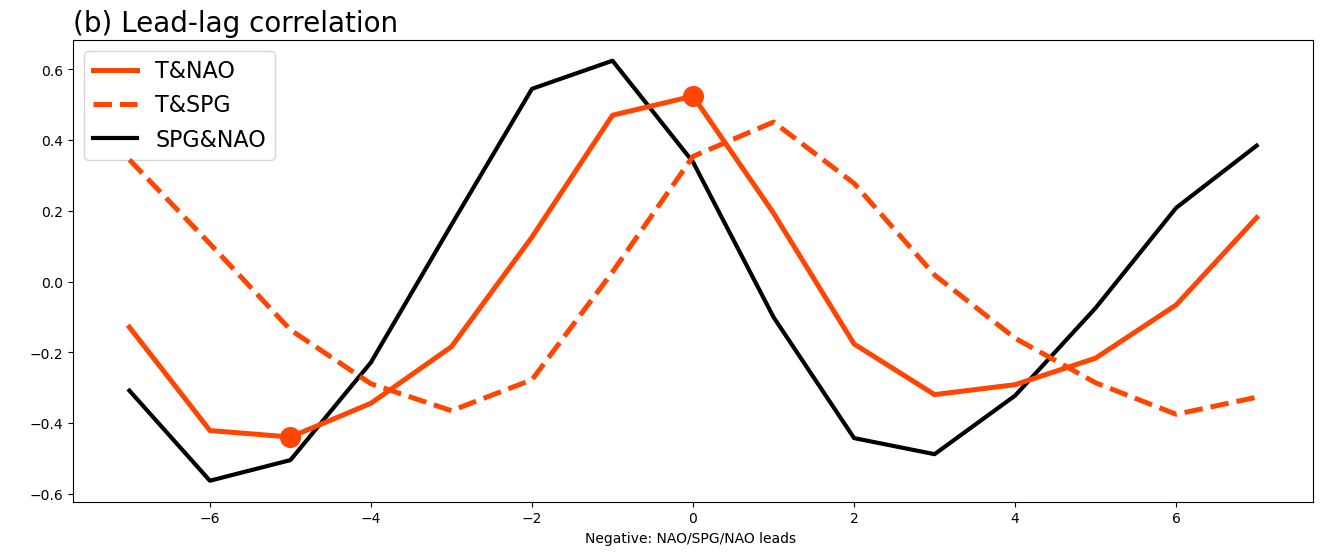

In [13]:
# 
     
x = np.arange(-n,n+1)
y1 = corr[:,0]
y2 = corr1[:,0]
y3 = corr2[:,0]
# y4 = corr[3,:]


fig, ax = plt.subplots(figsize = [16,6])

# ax.plot(x, y1, '-', linestyle='dashed',color='black', linewidth=2, markersize=10, label = 'C1')
# ax.plot(x, y1, '-',  color='black', linewidth=2, markersize=10, label = 'C1')
ax.plot(x, y1, '-', color='orangered', linewidth=3.6, markersize=10, label = 'T&NAO', zorder=10)
ax.plot(x, y2, '-', color='orangered',linestyle='dashed',linewidth=3.6, markersize=10, label = 'T&SPG', zorder=10)
ax.plot(x, y3, '-', linewidth=3, color='black',markersize=10, label = 'SPG&NAO')

# ax.scatter(x, y1, 'o-', s=[1,2,3,2,4,3,2,2,2,1], linestyle='dashed', color='blue',label = 'raw_dtrend')
# ax.scatter(x, y1,  marksize3,color='orangered')
# ax.scatter(x, y2,  marksize1,color='green')
ax.scatter(x[7], y1[7], 200,color='orangered', zorder=10)
ax.scatter(x[2], y1[2], 200,color='orangered', zorder=10)

# ax.scatter(x, y3,  marksize[2,:],color='orangered')
# ax.scatter(x, y4,  marksize[3,:],color='purple')

ax.set_title('(b) Lead-lag correlation ',size = '20', loc = 'left', pad = 19)

ax.set(xlabel='Negative: NAO/SPG/NAO leads ', ylabel=' ',
       title='')
# ax.set_ylim(-1, 0.8)
# ax.grid()
ax.legend(loc='upper left', fontsize='16')
# ax.annotate('5%', fontsize='16',
#             xy=(80, 150), xycoords='figure points')

plt.rcParams["font.size"] = "15"
plt.show()
fig.savefig('/work/uo1075/u241321/results/c2_lead.pdf')    